# Modelowanie Pandemii SARS COV-19

## Spis Treści

1. [WSTĘP](#wstęp)  

2. [Podstawy teoretyczne](#podstawy-teoretyczne)  
  * [Łańcuch Markowa](##łańcuch-markowa)  
  * [Wprowadzenie do modelu SI](##wprowadzenie-do-modelu-si)  
  * [Wprowadzenie do modelu SIR](##wprowadzenie-do-modelu-sir)
  * [Obliczanie współczynników $\beta$ i $\gamma$](##obliczanie-współczynników-za-pomocą-metody-brute-force)  

3. [ANALIZA ZACHOWANIA MODELI SI ORAZ SIR](#3-analiza-zachowania-modeli-si-oraz-sir)
  * [Rozwiązanie analityczne modelu SI](##rozwiązanie-analityczne-modelu-si)
  * [3.1 Metoda Eulera rozwiązywania równań różniczkowych](#metoda-eulera-rozwiązywania-równań-różniczkowych)
  * [Numeryczne rozwiązanie metodą Eulera równania SI](##numeryczne-rozwiązanie-metodą-eulera-równania-si)
  * [Numeryczne rozwiązanie metodą Eulera równania SIR](##numeryczne-rozwiązanie-metodą-eulera-równania-sir)  
  * [Wyniki modelowania metodą Eulera dla SI i SIR](##wyniki-modelowania-metodą-eulera-dla-si-i-sir)
  * [3.2 Metoda Runge-Kutta rzędu 4 (RK4) rozwiązywania równań różniczkowych](#metoda-runge-kutta-rzędu-4-rk4-rozwiązywania-równań-różniczkowych)  
  * [Wyjaśnienie metody Runge-Kutta rzędu 4](##wyjaśnienie-metody-runge-kutta-rzędu-4)  
  * [Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI](##numeryczne-rozwiązanie-metodą-runge-kutta-rzędu-4-modelu-si)  
  * [Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SIR](##numeryczne-rozwiązanie-metodą-runge-kutta-rzędu-4-modelu-sir)  
  * [Wyniki modelowania przy użyciu metody Runge-Kutta](##wyniki-modelowania-przy-użyciu-metody-runge-kutta)

4. [PORÓWNANINE BŁĘDÓW NUMERYCZNYCH](#4-porównanie-błędów-numerycznych)
  * [Wykresy I(t) dla Ian(t), Ie(t), Ian(t) oraz Irk(t)](##wykresy-it-dla-iant-ie-t-ian-t-oraz-irk-t)
  * [4.1 Wykres błędów](##wykres-błędów)
  * [4.2 Wykres logarytmiczny](##wykres-logarytmiczny)
  * [Wnioski](##wnioski)

5. [PODSUMOWANIE](#podsumowanie)  

6. [LITERATURA](#literatura)

---

# 1. WSTĘP

Choroby od zawsze stanowią nieodłączny element ludzkiego życia. Niektóre z nich, zyskując na sile, mogą wywołać ogromny strach i chaos w społeczeństwie. Takie wydarzenia określamy mianem epidemii. W obliczu masowych zachorowań i rozprzestrzeniania się chorób zakaźnych, konieczne stało się opracowanie narzędzi pozwalających na ich zrozumienie oraz przewidywanie dalszego rozwoju. Takie narzędzia stanowią matematyczne modele epidemiologiczne, które umożliwiają analizę dynamiki rozprzestrzeniania się oraz przebiegu chorób.

Modele epidemiologiczne zaczęły być opracowywane w odpowiedzi na potrzeby związane z epidemiami. Pierwszymi poważnymi próbami modelowania epidemii zajęli się William Ogilvy Kermack i Anderson Gray McKendrick, którzy w 1927 roku opracowali klasyczny model SIR. Natomiast model SI, który jest prostszą wersją modelu SIR, powstał nieco wcześniej, bo w latach 20. XX wieku, również w ramach badań nad epidemiami, i był szerzej stosowany do analizy chorób o mniejszym stopniu skomplikowania. Warto zauważyć, że wprowadzenie tych modeli nie było bezpośrednio związane z jedną, konkretną pandemią, ale wynikało z ogólnej potrzeby zrozumienia mechanizmów rozprzestrzeniania się chorób zakaźnych w społeczeństwie, zwłaszcza po epidemiach dżumy, grypy czy innych chorób zakaźnych, które dotykały społeczeństwa w tamtym czasie.

W ciągu ostatnich kilku lat byliśmy świadkami jednej z największych współczesnych epidemii – pandemii COVID-19. Wywołana przez wirus SARS-CoV-2, pandemia ta miała globalny zasięg i dotknęła miliony ludzi na całym świecie. W wyniku jej rozwoju, społeczeństwa zostały zmuszone do wprowadzenia surowych środków zapobiegawczych, takich jak lockdowny, które trwały przez niemal dwa lata. Jednakże dzięki modelom można było dokładniej przewidzieć przebieg choroby, a nawet przygotować strategie mającą za zadanie ograniczyć jej rozprzestrzenianie . W ramach tego projektu omówimy szczegółową budowę modeli SI i SIR, przeanalizujemy ich rozwiązania numeryczne oparte o dane z przebiegu pandemii oraz porównamy błędy, które mogą występować przy stosowaniu tych modeli do rzeczywistych danych.

---

# 2. PODSTAWY TEORYTYCZNE

## Łańcuch Markowa

Łańcuchy Markowa to matematyczne narzędzie, które znajduje szerokie zastosowanie w modelowaniu procesów stochastycznych, gdzie przyszły stan systemu zależy tylko od jego obecnego stanu, a nie od historii. Tego rodzaju procesy oparte na tzw. "braku pamięci" pozwalają na analizowanie i przewidywanie dynamiki zjawisk, które zachodzą w czasie, takich jak rozprzestrzenianie się chorób, ewolucja populacji czy decyzje gospodarcze.


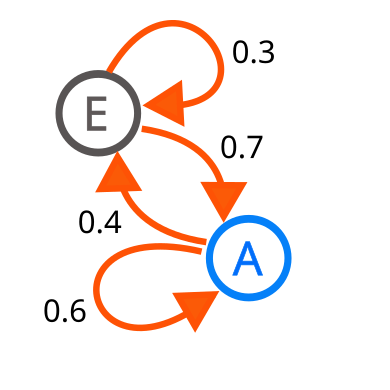

Łańcuchy Markowa oraz modele SI i SIR łączy fakt, że oba narzędzia służą do opisywania procesów przejścia z jednego stanu do drugiego w systemach dynamicznych. Modele te przedstawiają zbiór stanów(ogniwa), przejścia między nimi oraz prawdopodobieństwo, z jakim dane przejście może nastąpić. Kluczowym założeniem, jest to, że procesy te są "bez pamięci", co oznacza, że decyzja o przejściu do kolejnego stanu zależy wyłącznie od aktualnego stanu, a nie od historii wcześniejszych przejść. Na przykład, w kontekście modeli SIR i SI, skupiamy się na stanie faktycznym, a nie na sytuacji, w której dana jednostka już kiedyś była chora.

Jednakże, w przeciwieństwie do klasycznych łańcuchów Markowa, które zakładają stałe prawdopodobieństwo przejścia między stanami, modele SIR i SI są bardziej złożone. W tych modelach prawdopodobieństwa przejść zależą od różnych czynników, takich jak współczynnik zakażeń ($\beta$) lub wyzdrowień ($\gamma$) oraz czas trwania infekcji, które zmieniają się w zależności od etapu epidemii, siły choroby oraz innych parametrów epidemiologicznych. Na przykład, współczynnik zakażeń może się różnić w zależności od stopnia kontaktów międzyludzkich, dostępności leczenia czy interwencji zdrowotnych, co sprawia, że te modele są bardziej dynamiczne i uwzględniają zmienność w czasie.

W związku z tym, można stwierdzić, że modele SIR i SI są pochodnymi łańcuchów Markowa. Natomiast dzięki bardziej złożónym parametrom modele epidemiologiczne lepiej analizują rozprzestrzeniania się chorób, które uwzględniają zmieniające się warunki oraz charakterystykę populacji. 

## Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie (S) oraz osoby zakażone (I). Razem tworzą one populację (N). 
$${N} = {S} + {I}$$
Osoby zakażone mogą przekazywać chorobę osobom podatnym, co prowadzi do wzrostu liczby zakażonych, podczas gdy liczba osób podatnych maleje. Kluczowym parametrem w modelu jest szybkość zarażania $\beta$, który opisuje tempo, z jakim choroba jest przekazywana. Współczynnik ten zależy od liczby kontaktów między osobami zakażonymi a osobami podatnymi na zakażenie. Możemy wyróżnić:
$$
\beta \cdot I - \text{Liczba kontaktów ogólna} \\
\beta \cdot I \cdot \frac{S}{N} - \text{Liczba kontaktów z podatnymi}
$$

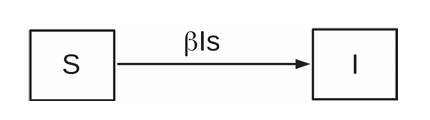

Schemat modelu SI. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$. Jest to także przykładowy łańcuch markowa.

Przyrost nowych zakażeń($I_{new}$) można zapisać wzorem:
$$ {I_{new}} = \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Dodatkowo zmianę liczby zakażeń w czasie można zapisać jako:
$$I( t + \delta ) = I(t) + I_{new} $$
Dzieki temu otrzymamy:
$$I( t + \delta ) = I(t) + \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Po odpowiednich przekształceniach[numer artykulu] dostaniemy 
$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N}$$

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.

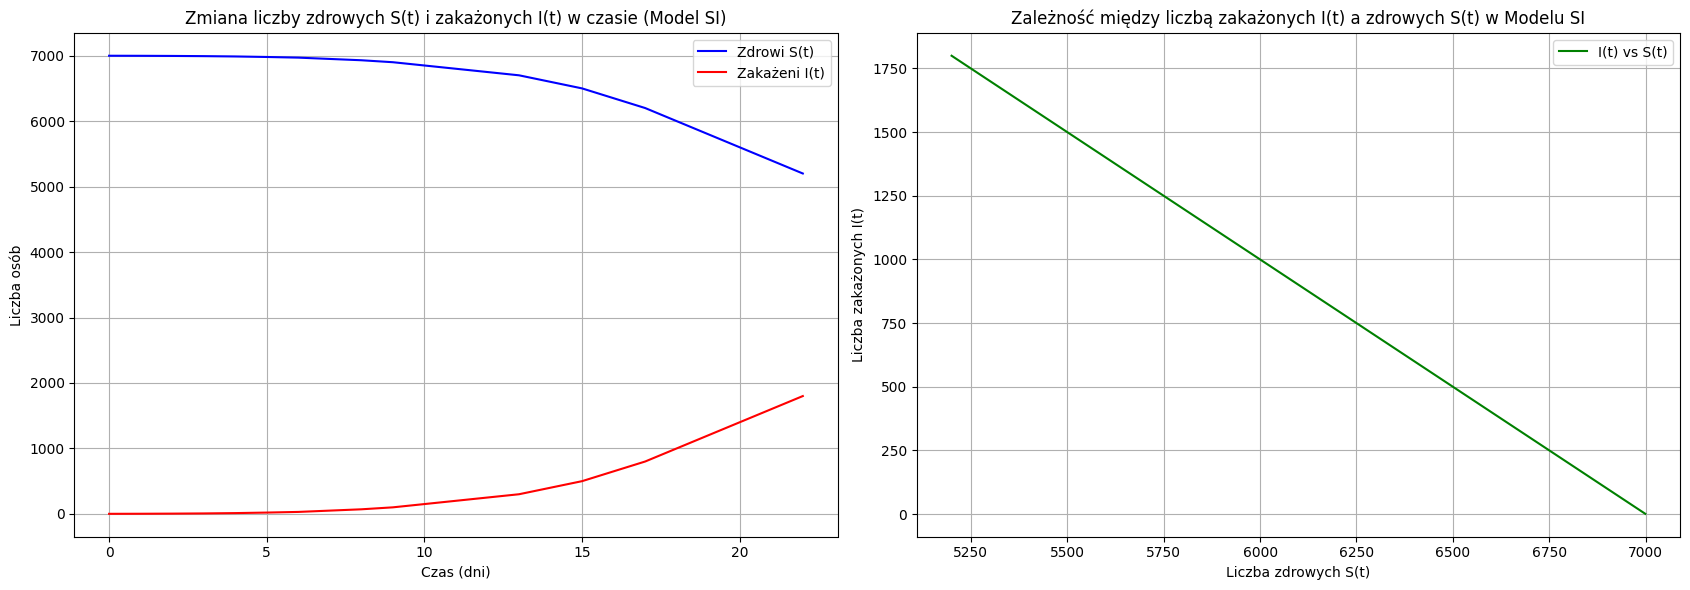

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
N = 7000  # Całkowita liczba osób w populacji
infected_data = [1, 2, 4, 7, 12, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 650, 800, 1000, 1200, 1400, 1600, 1800]
susceptible_data = [N - infected_data[i] for i in range(len(infected_data))]

# Wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres S(t) i I(t) na jednym wykresie
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='blue')
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].set_title("Zmiana liczby zdrowych S(t) i zakażonych I(t) w czasie (Model SI)")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od S(t)
ax[1].plot(susceptible_data, infected_data, label="I(t) vs S(t)", color='green')
ax[1].set_title("Zależność między liczbą zakażonych I(t) a zdrowych S(t) w Modelu SI")
ax[1].set_xlabel("Liczba zdrowych S(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Wprowdzenie do modelu SIR

Model SIR (Susceptible-Infected-Recovered) wprowadza do wcześniej poznanych kategorii S (osoby podatne na zakażenie) oraz I (osoby zakażone) nową kategorię: 𝑅 (osoby wyzdrowiałe lub zmarłe). Do kategorii zaliczają się osoby, które nie są już dłużej zakażone. Obejmuje to zarówno osoby, które zmarły w wyniku choroby, jak i te, które wyzdrowiały, nabywając odporność (nie mogą zachorować ponownie).
W przeciwieństwie do modelu SI, w modelu SIR liczba zakażonych osiąga szczyt, a następnie maleje, ponieważ coraz więcej osób przechodzi do kategorii 
R. Jest to jeden z podstawowych modeli epidemiologicznych, szeroko stosowany do opisu przebiegu epidemii.
Dodatkowo w modelu pojawia się nowy parametr: szybkość zdrowienia $\gamma$, który określa tempo przechodzenia osób zakażonych do kategorii R. Liczbę ozdrowień w czasie możemy wyrazić wzorem:
$$\gamma \cdot {I} - \text{Liczba ozdrowień w czasie}$$

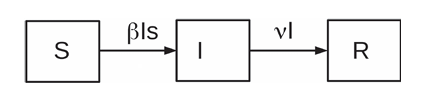

Schemat modelu SIR. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$, a ${v}$ gammę. Jest to także przykładowy łańcuch markowa.

Możemy zapisać równanie:
$$ S(t + \delta) = S(t) - I_{new}$$
Dzięki czemu dla liczby osobników podatnych otrzymamy
$$\frac{dS}{dt} = - \beta \cdot {I(t)} \cdot \frac{S(t)}{N}$$
Po odpowiednich przekształceniach dostaniemy:
$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} - \gamma \cdot {I} \\
\frac{dR}{dt} = \gamma \cdot {I}
$$
Te trzy równania stanowią ostateczną postać modelu SIR, opisującą dynamikę zmian w liczebności poszczególnych grup.
Model SIR można rozszerzyć, wprowadzając różne relacje pomiędzy grupami, np. uwzględniając sytuację, w której osobnik nie nabywa odporności i może ponownie zachorować. Jednak w naszym projekcie skupimy się na jego klasycznej formie. Model ten, mimo swojej prostoty, jest kluczowym narzędziem do analizy rozprzestrzeniania się chorób i stanowi fundament bardziej zaawansowanych modeli epidemiologicznych.

Na potrzebe pokazania jak zachowuje się Model SIR w czasie Pandemii przyjmiemy inne dane, ponieważ dla $n=37.900.000$ przy pierwszych 37 dniach nie zobaczymy pełnego zachowania Pandemii, przyjmiemy, że $n=7000$.

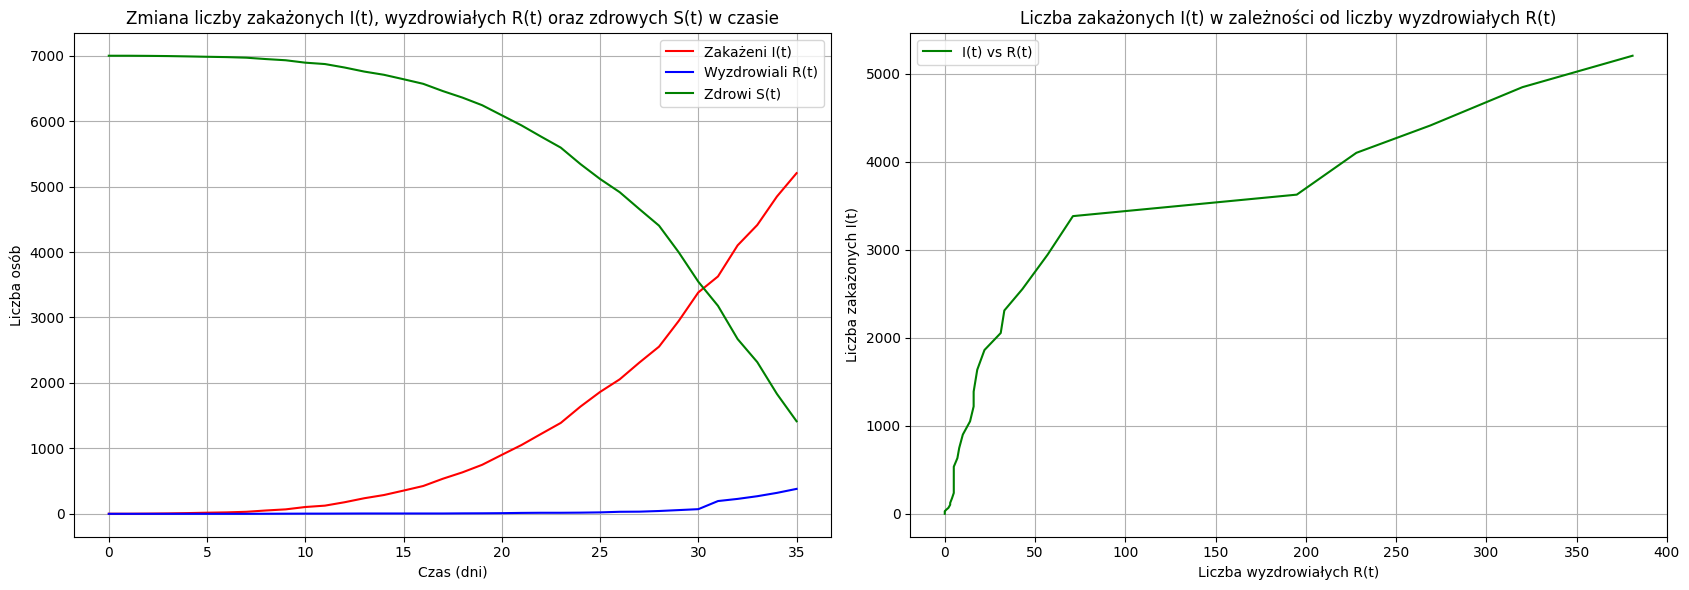

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
N = 7000
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]
# Susceptible (S) to być obliczone jako pozostała liczba osób
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Tworzymy wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres I(t), R(t) i S(t) na jednym wykresie
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].plot(recovery_data, label="Wyzdrowiali R(t)", color='blue')
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='green')
ax[0].set_title("Zmiana liczby zakażonych I(t), wyzdrowiałych R(t) oraz zdrowych S(t) w czasie")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od R(t)
ax[1].plot(recovery_data, infected_data, label="I(t) vs R(t)", color='green')
ax[1].set_title("Liczba zakażonych I(t) w zależności od liczby wyzdrowiałych R(t)")
ax[1].set_xlabel("Liczba wyzdrowiałych R(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



---

## Obliczanie współczynników $\beta$ i $\gamma$

### Metoda brute force

Algorytm brute force, czyli "siłowy", polega na przeszukaniu całego dostępnego zakresu możliwych wartości dla współczynników $\beta$ i $\gamma$ oraz znalezieniu takich, które minimalizują błąd dopasowania modelu do danych.

1. Zaczynamy od ustalenia zakresu wartości, w którym będziemy szukać optymalnych współczynników. $\beta$ i $\gamma$:
   - W tym przykładzie $\beta \in [0, 0.5]$, a $\gamma \in [0,0.3]$.

2. Dla każdej pary wartości $\beta$ i $\gamma$ rozwiązujemy równania modelu SIR, a następnie obliczamy, jak bardzo przewidywane wyniki różnią się od rzeczywistych danych zakażonych (I) i wyzdrowiałych (R). Błąd dopasowania jest mierzony jako średni błąd kwadratowy (Mean Squared Error - MSE).

3. Algorytm przechodzi przez wszystkie kombinacje $\beta$ i $\gamma$ w zadanym zakresie, obliczając dla każdej kombinacji błąd dopasowania. Na końcu wybieramy parametry, które minimalizują ten błąd.

### Mean Squared Error

Mean Squared Error(MSE) to metoda wyznaczania błędu dopasowania modelu do danych rzeczywistych, polega na obliczeniu średniej z kwadratu różnicy danych rzeczyiwstych i danych pochodzących z modelu matematycznego. Wyrażenie różnić jako kwadratów jest konieczne, aby wyeliminować sytuacje w której dodatnie i ujemne różnice odejmowały by się od siebie dając wynik równy zero.

**Wzór na błąd średniokwadratowy (MSE):**
$$\text{MSE} = \frac{\sum_{i=1}^{n} (y_i - p_i)^2}{n}$$
+ $y_i$ realna wartość 
+ $p_i$ modelowana wartość
+ $n$ liczba obserwacji
+ $\Sigma$ suma wszystkich różnić
### Zastosowanie

Metoda brute force jest stosunkowo prosta, ale może być czasochłonna przy dużych zakresach parametrów. Pomimo tego jest bardzo intuicyjna i skuteczna w przypadku małych przestrzeni poszukiwań, jak w tym przykładzie. Po znalezieniu optymalnych współczynników możemy wykorzystać model SIR do prognozowania przyszłego rozwoju epidemii.

In [15]:
import numpy as np
from scipy.optimize import minimize

# Dane wejściowe
n = 37_900_000  # Populacja
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536,
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383,
                 3627, 4102, 4413, 4848, 5205]
I0 = infected_data[0]  # Początkowa liczba zakażonych
t = np.arange(len(infected_data))  # Czas w dniach

# Funkcja analityczna SI
def I_model(beta, t, I0, N):
    S0 = N - I0
    return (N * I0 * np.exp(beta * t)) / (S0 + I0 * np.exp(beta * t))

# Funkcja błędu (MSE)
def mse(beta):
    I_simulated = I_model(beta, t, I0, n)  # Oblicz liczby zakażonych dla danego beta
    return np.mean((np.array(I_simulated) - np.array(infected_data))**2)

# Szukanie beta minimalizujące MSE
result = minimize(mse, x0=0.3, bounds=[(0.2, 0.4)])  # Zakres beta od 0.2 do 0.4
best_beta_an = result.x[0]

# Wyświetlenie najlepszego beta
print(f"Najlepsza wartość beta: {best_beta_an:.4f}")

Najlepsza wartość beta: 0.2527


---

# 3. ANALIZA ZACHOWANIA MODELI SI ORAZ SIR

## Rozwiązanie analityczne modelu SI

Ze względu na swoją prostotę model SI można rozwiązać analitycznie. Rozważamy równanie opisujące dynamikę liczby zakażonych:
$$\frac{dI}{dt} = \beta S I$$
gdzie $\beta$ jest współczynnikiem transmisji, $S$ to liczba osób podatnych, a $I$  to liczba osób zakażonych. Zakładamy przy tym, że całkowita populacja $N$  pozostaje stała, co pozwala wyrazić $S$  jako:$~~S = N - I$.
Zatem po podstawieniu otrzymamy:
$$\frac{dI}{dt} = \beta \left(N - I \right) I$$
Następnie możemy wyrażenie z całościować:
$$\int \frac{1}{I \left(N - I \right)}~~dI = \int \beta ~~dt $$
Aby rozwiązać całkę po lewej stronie, musimy użyć rozkładu na ułamki proste:
$$ \frac{1}{I \left(N - I \right)} = \frac{A}{I} + \frac{B}{N - I}$$
Po jego rozwiązaniu otrzymamy:
$$ \frac{1}{I \left(N - I \right)} = \frac{1}{N} \left(\frac{1}{I} + \frac{1}{N - I}\right)$$
Stąd dostaniemy:
$$\int  \frac{1}{N} \left(\frac{1}{I} + \frac{1}{N - I}\right)~~dI = \int \beta ~~dt$$
Po odpowiednich przekształceniach powstanie:
$$\ln \frac{I}{N - I} = N \beta t + C$$
Ponieważ $I$ oraz $N - I$ nie osiagają wartości ujemnych mogliśmy swobodnie opuścić wartość bezwzględną przy logarytmie naturalnym.
Po podstawieniu $e$ dostaniemy:
$$\frac{I}{N -I} = D e^{N \beta t}$$
gdzie $D = e^{C}$ (stała).
Po odpowiednich przekształceniach dojdziemy do postaci:
$$ I = \frac{N D e^{N \beta t}}{1 + D e^{N \beta t}}$$
Korzystając z faktu $ I\left(0\right) = I_0 $ dostajemy $D = \frac{I_0}{N - I_0} $. Po podstawieniu $D$ otrzymamy:
$$ I(t) = \frac{N \frac{I_0}{N - I_0} e^{N \beta t}}{1 + \frac{I_0}{N - I_0} e^{N \beta t}} = \frac{N I_0 e^{N \beta t}}{N  + I_0 (e^{N \beta t} - 1)} $$
Jest to rozwiazanie analityczne układu SI.

# Rozwiazanie pierwszych 36 dni

# 3.1 Metoda Eulera rozwiązywania równań różniczkowych

### Wyjaśnienie metody Eulera

Metoda Eulera służy do rozwiązywania równań różniczkowych pierwszego rzędu w postaci [[x]](https://vistula.pk.edu.pl/~sciezor/Kurs_TI_XP/Excel2_lekcja_4.pdf):


\begin{equation}
\frac{dy}{dt} = f(t, y), \quad y(x_0) = y_0
\end{equation}

Zakładamy, że każdy kolejny punkt jest oddalony o krok **h** na osi **OX** oraz o $\Delta$**y** na osi **OY**  

\begin{equation}
x_{n+1} = x_n + h
\end{equation}

Z definicji pochodnej, rozumianej jako tangens kąta nachylenia stycznej w punkcie na wykresie funkcji, wynika, że

\begin{equation}
y' = \frac{\Delta y}{h} = f(x_n, y_n)
\end{equation}

Po przekształceniu:


\begin{equation}
\Delta y = h \cdot f(x_n, y_n)
\end{equation}

Wzór na kolejny $y_{n+1}$ będzie zależał od $y_n$ oraz $\Delta$**y**

\begin{equation}
y_{n+1} = y_n + h \cdot f(x_n, y_n)
\end{equation}

## Numeryczne rozwiązanie metodą Eulera równania SI

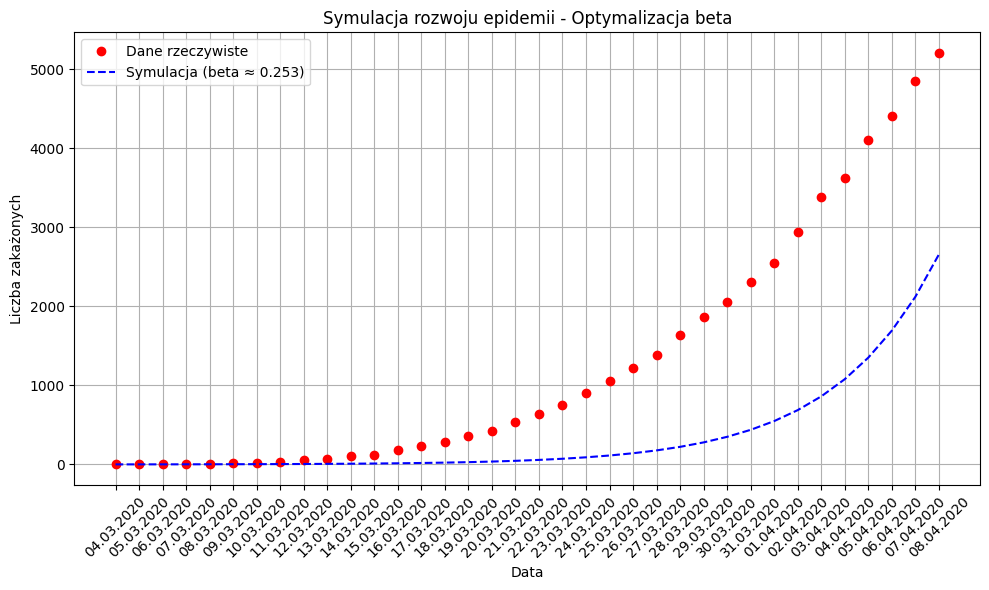

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych

# Funkcja do aktualizacji modelu
def update(beta):
    t_max = len(dates)  # Ilość dni
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
    dt = 1  # Krok czasowy

    # Rozwiązanie równania metodą Eulera
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI

    return I

# Symulacja z najlepszym beta
Iesi = update(best_beta_an)  # Zapisanie wyników do Iesi

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(range(len(dates)), infected_data, 'o', label='Dane rzeczywiste', color='red')
plt.plot(range(len(dates)), Iesi, label=f'Symulacja (beta ≈ {best_beta_an:.3f})', linestyle='--', color='blue')
plt.xticks(range(len(dates)), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii - Optymalizacja beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Numeryczne rozwiązanie metodą Eulera równania SIR

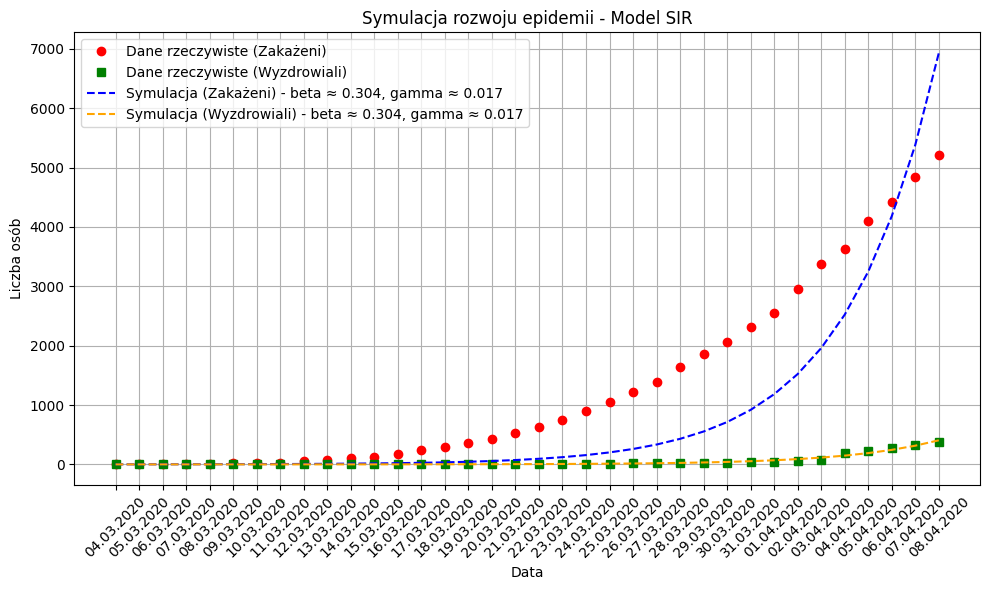

Najlepsza beta: 0.304, Najlepsza gamma: 0.017


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Inicjalizacja danych
n = 37900000  # Całkowita populacja
S0 = 37899999  # Początkowa liczba osób zdrowych
I0 = 1    # Początkowa liczba zakażonych
R0 = 0       # Początkowa liczba wyzdrowiałych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Funkcja do aktualizacji wykresu
def update_model(beta, gamma):
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    R0 = 0
    S[0] = S0  # S0 to początkowa liczba osób zdrowych
    I[0] = I0  # I0 to początkowa liczba zakażonych
    R[0] = R0  # R0 to początkowa liczba wyzdrowiałych
    dt = 1  # Krok czasowy (1 dzień)

    # Pętla symulacji modelu SIR
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Zapisanie wyników do Se (S(t)) i Ie (I(t))
    Se = S
    Ie = I
    Re = R

    return Se, Ie, Re

# Funkcja MSE (średni błąd kwadratowy) dla zakażonych i wyzdrowiałych
def mse(params):
    beta, gamma = params
    Se, Ie, Re = update_model(beta, gamma)
    
    # Obliczenie MSE dla zakażonych i wyzdrowiałych
    mse_infected = np.mean((Ie - infected_data)**2)
    mse_recovered = np.mean((Re - recovery_data)**2)
    
    # Suma MSE dla zakażonych i wyzdrowiałych
    return mse_infected + mse_recovered

# Zakres wartości dla beta i gamma
beta_values = np.linspace(0.15, 0.4, 500)  # 50 wartości beta w przedziale [0, 1]
gamma_values = np.linspace(0, 0.1, 500)  # 50 wartości gamma w przedziale [0, 1]

# Inicjalizacja zmiennych do przechowywania najlepszych wyników
best_mse = float('inf')  # Najlepszy MSE
best_beta = None         # Najlepsza beta
best_gamma = None        # Najlepsza gamma

# Pętla po wszystkich parach (beta, gamma)
for beta in beta_values:
    for gamma in gamma_values:
        current_mse = mse([beta, gamma])
        if current_mse < best_mse:
            best_mse = current_mse
            best_beta = beta
            best_gamma = gamma

# Wywołanie funkcji z optymalnymi parametrami beta i gamma
Se, Iesir, Resir = update_model(best_beta, best_gamma)

# Tworzenie wykresu z najlepszymi wartościami beta i gamma
plt.figure(figsize=(10, 6))
plt.plot(range(len(dates)), infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(range(len(dates)), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(range(len(dates)), Iesir, label=f'Symulacja (Zakażeni) - beta ≈ {best_beta:.3f}, gamma ≈ {best_gamma:.3f}', linestyle='--', color='blue')
plt.plot(range(len(dates)), Resir, label=f'Symulacja (Wyzdrowiali) - beta ≈ {best_beta:.3f}, gamma ≈ {best_gamma:.3f}', linestyle='--', color='orange')

plt.xticks(range(len(dates)), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba osób')
plt.title('Symulacja rozwoju epidemii - Model SIR')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Wyświetlenie wyników
print(f"Najlepsza beta: {best_beta:.3f}, Najlepsza gamma: {best_gamma:.3f}")



## Wyniki modelowania metodą Eulera dla SI i SIR


### SI

Na wykresie można zaobserwować powolny wzrost liczby chorych, natomiast zastosowany model SI wykazuje bardzo gwałtowny wzrost. Model SI przewiduje dalszy, bardzo szybki wzrost liczby zakażonych, który nie ma odzwierciedlenia w rzeczywistych danych. Wynika to z tego, że model SI nie uwzględnia wielu czynników zewnętrznych takich jak śmierć osób zakażonych, interwencji społecznych, osób wyleczonych czy też osób narażonych na zakażenie, które wpływają na tempo rozwoju epidemii. Model SI, oparty na stałym współczynniku infekcji, nie uwzględnia dynamicznych zmian w rozwoju epidemii, co może prowadzić do nadmiernego prognozowania osób zarażonych. Współczynnik $\beta$ może być różny w innych etapach epidemii, więc stały parametr nie odzwierciedla realnej sytuacji. 

### SIR

Model SIR pokazuje wolniejszy wzrost zakażonych niż model SI. Można zauważyć, że dodanie współczynnika odpowiadającego za osoby wyleczone zwalnia wzrost zakażeń w symulacji, dzięki czemu bardziej odpowiada danym rzeczywistym. Warto podkreślić, że nie jest to idealny model, ponieważ podobnie jak model SI nie uwzględnia wiele czynników, które wpływają na rozwój epidemii. Model SIR może sprawdzić się w modelowaniu początku epidemii, w kolejnych fazach epidemii problemem mogą okazać się stałe współczynniki $\beta$ oraz $\gamma$.

---

# 3.2 Metoda Runge-Kutta rzędu 4 (RK4) rozwiązywania równań różniczkowych

### Wyjaśnienie metody Runge-Kutta rzędu 4 (RK4)

Metoda RK4 jest jedną z najczęściej używanych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych. Popularność zawdzięcza swojej wyjątkowej precyzji, będącej efektem wyższego rzędu dokładności w stosunku do prostszych metod, takich jak metoda Eulera.

Metoda Rungego-Kutty rzędu 4 (RK4) opiera się na następujących wzorach:

1. Początkowy warunek:
$$u_0 = \alpha$$

2. Wyznaczanie kolejnych współczynników:
$$k_1 = F(t, y_n)$$
$$k_2 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)$$
$$k_3 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_2\right)$$
$$k_4 = F\left(t + h, y_n\right)$$

3. Aktualizacja wartości $u_{i+1}$:
$$y_{i+1} = y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right), \quad \text{dla } n = 0, 1, \ldots$$

Gdzie:
* ${h}$ — krok czasowy,
* ${F(t,y)}$ — funkcja opisująca równanie różniczkowe $\frac{dy}{dt} = F(t, y)$,
* ${t}$ — czas,
* ${y_n}$ — wartość rozwiązania w kroku ${n}$.

## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI 

Żeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

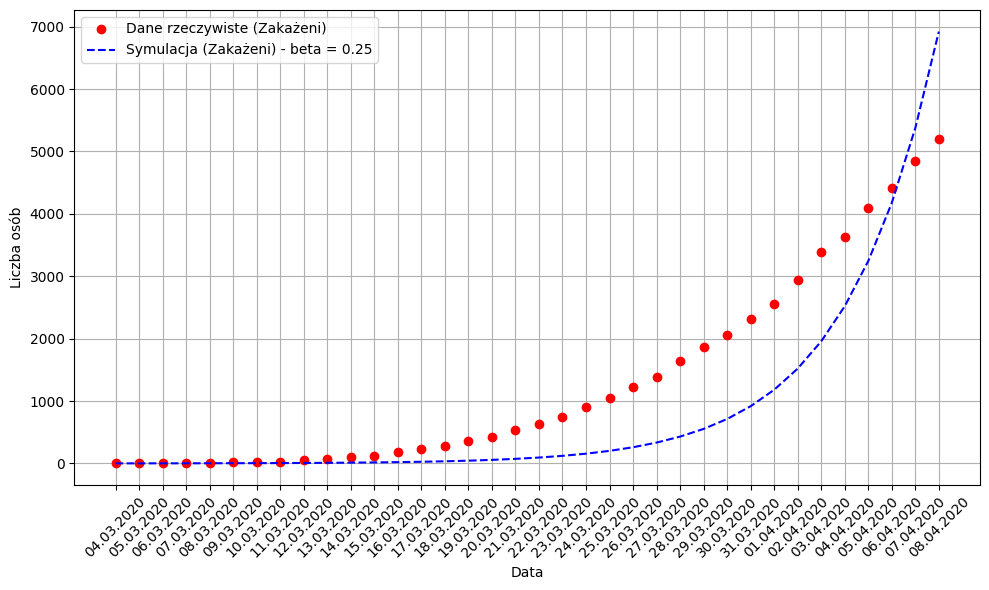

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Symulacja z najlepszym beta
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
Irksi = [I]  # Zmienna, do której zapisujemy wartości zakażonych
# Symulacja RK4 dla najlepszego beta
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta_an, n, h)
    Irksi.append(I)  # Zapisanie wartości zakażonych do Irksi

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, Irksi, label=f'Symulacja (Zakażeni) - beta = {best_beta_an:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SIR 
Żeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

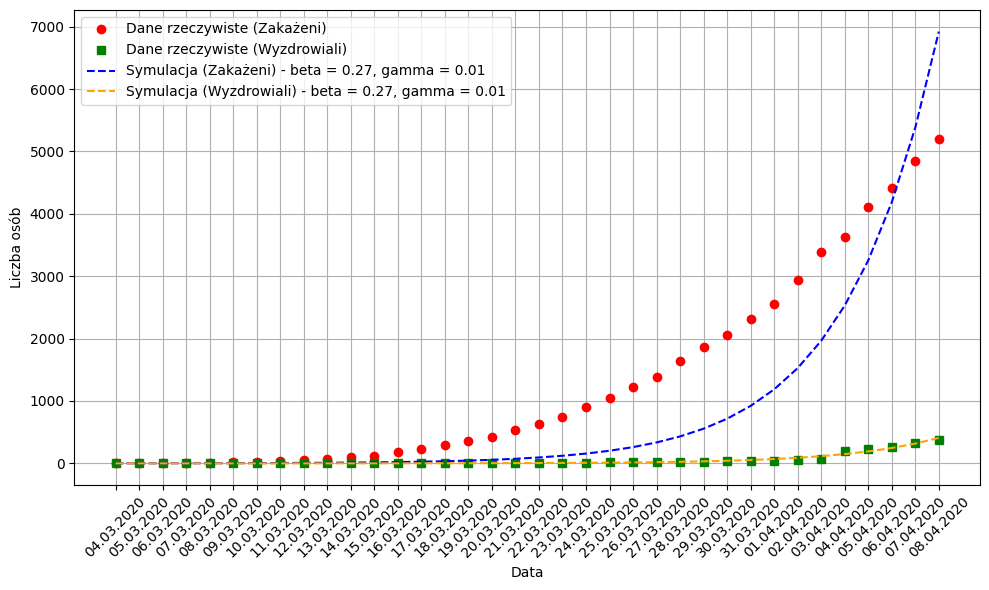

Najlepsze beta: 0.268
Najlepsze gamma: 0.015


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje SIR
def f(S, I, beta, n):
    return -beta * S * I / n

def g(S, I, beta, gamma, n):
    return beta * S * I / n - gamma * I

def j(I, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h, n):
    k1_S = f(S, I, beta, n)
    k1_I = g(S, I, beta, gamma, n)
    k1_R = j(I, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, n)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, gamma, n)
    k2_R = j(I + h * k1_I / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, n)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, gamma, n)
    k3_R = j(I + h * k2_I / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, n)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, gamma, n)
    k4_R = j(I + h * k3_I, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Funkcja do obliczania MSE
def mse(params, n, dates, infected_data, recovery_data):
    beta, gamma = params  # Parametry beta i gamma
    S, I, R = n - infected_data[0] - recovery_data[0], infected_data[0], recovery_data[0]
    h = 1  # Krok czasowy (1 dzień)
    I_vals = [I]
    R_vals = [R]
    
    # Symulacja RK4 dla danej pary beta i gamma
    for t in range(1, len(dates)):
        S, I, R = rk4_step(S, I, R, beta, gamma, h, n)
        I_vals.append(I)
        R_vals.append(R)
    
    # Obliczenie MSE na podstawie danych o zakażonych i wyzdrowiałych
    mse_infected = np.mean((np.array(I_vals[:len(dates)]) - np.array(infected_data))**2)
    mse_recovered = np.mean((np.array(R_vals[:len(dates)]) - np.array(recovery_data))**2)
    
    # Sumowanie MSE dla obu serii danych
    return mse_infected + mse_recovered

# Parametry
n = 1000000  # Przykład całkowitej liczby osób w populacji (do dostosowania w zależności od danych)
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Zakresy dla beta i gamma
beta_range = np.linspace(0.15, 0.4, 500)  # Zakres wartości beta
gamma_range = np.linspace(0.01, 0.1, 500)  # Zakres wartości gamma

# Wyszukiwanie najlepszych wartości beta i gamma
best_mse = np.inf
best_beta = None
best_gamma = None

# Sprawdzanie różnych kombinacji beta i gamma
for beta in beta_range:
    for gamma in gamma_range:
        current_mse = mse([beta, gamma], n, dates, infected_data, recovery_data)
        if current_mse < best_mse:
            best_mse = current_mse
            best_beta = beta
            best_gamma = gamma

# Symulacja z najlepszymi parametrami
S, I, R = n - infected_data[0] - recovery_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzień)
Irksir = [I]  # Inicjalizacja listy Irksir
Rrksir = [R]  # Inicjalizacja listy Rrk

# Symulacja RK4 dla najlepszych wartości beta i gamma
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, best_beta, best_gamma, h, n)
    Irksir.append(I)  # Zapisanie wartości I do Irksir
    Rrksir.append(R)  # Zapisanie wartości R do Rrk

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, Irksir, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='blue')
plt.plot(dates, Rrksir, label=f'Symulacja (Wyzdrowiali) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()

# Wyświetlenie najlepszych wartości beta i gamma
print(f"Najlepsze beta: {best_beta:.3f}")
print(f"Najlepsze gamma: {best_gamma:.3f}")


## Wyniki modelowania przy użyciu metody Runge-Kutta


### SI

### SIR

---

# 4. Porównanie błędów numerycznych

## Analityczne rozwianie problemu

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Dane rzeczywiste (przykład - należy zastąpić własnymi)
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]
t = np.linspace(0, 36, 36)  # Czas w dniach
N = 37_900_000  # Całkowita populacja
I0 = 1  # Początkowa liczba zakażonych

# Funkcja analityczna dla SI
def SI_analytical(N, I0, beta, t):
    S0 = N - I0
    I_t = (I0 * np.exp(beta * t)) / (S0 + I0 * (np.exp(beta * t) - 1))
    return I_t

# Wyniki modelu z najlepszym beta
IsiAN = SI_analytical(N, I0, best_beta, t) * N
print(IsiAN)

[1.00000003e+00 1.31703773e+00 1.73458834e+00 2.28451823e+00
 3.00879660e+00 3.96269848e+00 5.21902316e+00 6.87365001e+00
 9.05285575e+00 1.19229515e+01 1.57029752e+01 2.06814078e+01
 2.72381892e+01 3.58737142e+01 4.72470202e+01 6.22260827e+01
 8.19540549e+01 1.07936507e+02 1.42156321e+02 1.87225013e+02
 2.46582017e+02 3.24757145e+02 4.27716244e+02 5.63316408e+02
 7.41905456e+02 9.77111399e+02 1.28688204e+03 1.69485393e+03
 2.23215489e+03 2.93977728e+03 3.87170233e+03 5.09901282e+03
 6.71530574e+03 8.84381410e+03 1.16467750e+04 1.53377476e+04]


## Obliczanie błędu dla metod Eulera i Rungego-Kutty

### Wzór na błąd:

$\epsilon(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$

gdzie:
- $S(t)$ to wartości obliczone metodą Eulera,
- $Se(t)$ to wartości obliczone metodą Eulera przy danym kroku czasowym \(\Delta t\),
- $Srk(t)$ to wartości obliczone metodą Rungego-Kutty,
- $Irk(t)$ to rzeczywiste rozwiązanie.

### Kroki obliczeniowe:

1. **Oblicz błąd metody Eulera**:
    
    $\epsilon_E(\Delta t) = \sup_{t \in [0,T]} |I(t) - Ie(t)|$
    
2. **Oblicz błąd metody Rungego-Kutty**:
    
    $\epsilon_{RK}(\Delta t) = \sup_{t \in [0,T]} |I(t) - Irk(t)|$

3. **Przygotowanie wykresu**:
    - Na osi X: $\frac{1}{\Delta t} $
    - Na osi Y: $\epsilon(\Delta t)$

## Wykresy I(t) dla Ian(t) i Ie(t) oraz Ian(t) oraz Irk(t) 

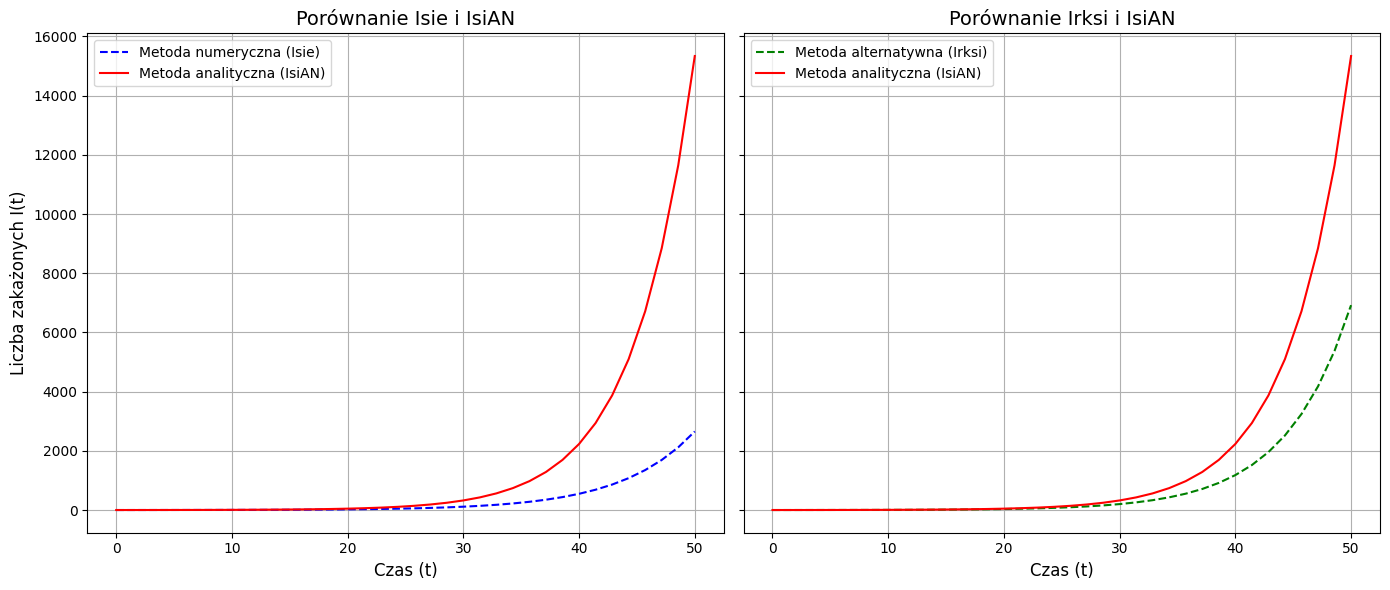

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Przykładowy wektor czasu (dopasowany do długości danych)
t = np.linspace(0, 50, len(Iesi))  # Zakładamy równomierny czas próbkowania

# Tworzenie wykresu
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Wykres 1: Porównanie Isie i IsiAN
axs[0].plot(t, Iesi, label='Metoda numeryczna (Isie)', linestyle='--', color='blue')
axs[0].plot(t, IsiAN, label='Metoda analityczna (IsiAN)', linestyle='-', color='red')
axs[0].set_title('Porównanie Isie i IsiAN', fontsize=14)
axs[0].set_xlabel('Czas (t)', fontsize=12)
axs[0].set_ylabel('Liczba zakażonych I(t)', fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True)

# Wykres 2: Porównanie Irksi i IsiAN
axs[1].plot(t, Irksi, label='Metoda alternatywna (Irksi)', linestyle='--', color='green')
axs[1].plot(t, IsiAN, label='Metoda analityczna (IsiAN)', linestyle='-', color='red')
axs[1].set_title('Porównanie Irksi i IsiAN', fontsize=14)
axs[1].set_xlabel('Czas (t)', fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True)

# Dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


## 4.1 Wykres błędów

<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dżejnek\AppData\Local\Temp\ipykernel_5048\104597713.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Wykres dla $\Delta t = {delta_t}$', fontsize=14)


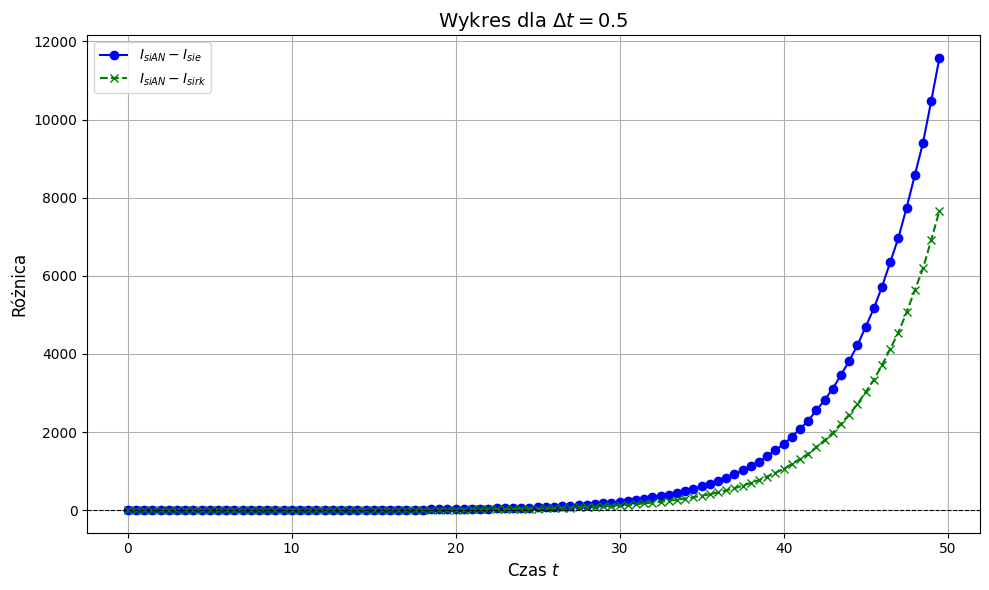

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Dane przykładowe
delta_t = 0.5  # Wartość kroku czasowego
T = 50  # Maksymalny czas symulacji

# Wyniki analityczne i dane do testów (przykładowe)
t_high_res = np.linspace(0, T, 1000)
IsiAN_high_res = np.interp(t_high_res, np.linspace(0, T, len(IsiAN)), IsiAN)


# Punkty czasowe dla delta_t
t_num = np.arange(0, T, delta_t)

# Interpolacja wyników analitycznych w punktach numerycznych
IsiAN_interp = np.interp(t_num, t_high_res, IsiAN_high_res)

# Interpolacja wyników numerycznych dla Isie i Isirk
Isie_interp = np.interp(t_num, np.linspace(0, T, len(Iesi)), Iesi)
Isirk_interp = np.interp(t_num, np.linspace(0, T, len(Irksi)), Irksi)

# Różnice w każdym punkcie
diff_sie = IsiAN_interp - Isie_interp
diff_sirk = IsiAN_interp - Isirk_interp

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(t_num, diff_sie, label='$I_{siAN} - I_{sie}$', marker='o', linestyle='-', color='blue')
plt.plot(t_num, diff_sirk, label='$I_{siAN} - I_{sirk}$', marker='x', linestyle='--', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(f'Wykres dla $\Delta t = {delta_t}$', fontsize=14)
plt.xlabel('Czas $t$', fontsize=12)
plt.ylabel('Różnica', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## 4.2 Wykres logarytmiczny

C:\Users\Dżejnek\AppData\Local\Temp\ipykernel_5048\1476095802.py:15: RuntimeWarning: divide by zero encountered in divide
  IsiAN_interp = np.interp(1/t_num, t_high_res, IsiAN_high_res)
C:\Users\Dżejnek\AppData\Local\Temp\ipykernel_5048\1476095802.py:18: RuntimeWarning: divide by zero encountered in divide
  Isie_interp = np.interp(1/t_num, np.linspace(0, T, len(Iesi)), Iesi)
C:\Users\Dżejnek\AppData\Local\Temp\ipykernel_5048\1476095802.py:19: RuntimeWarning: divide by zero encountered in divide
  Isirk_interp = np.interp(1/t_num, np.linspace(0, T, len(Irksi)), Irksi)


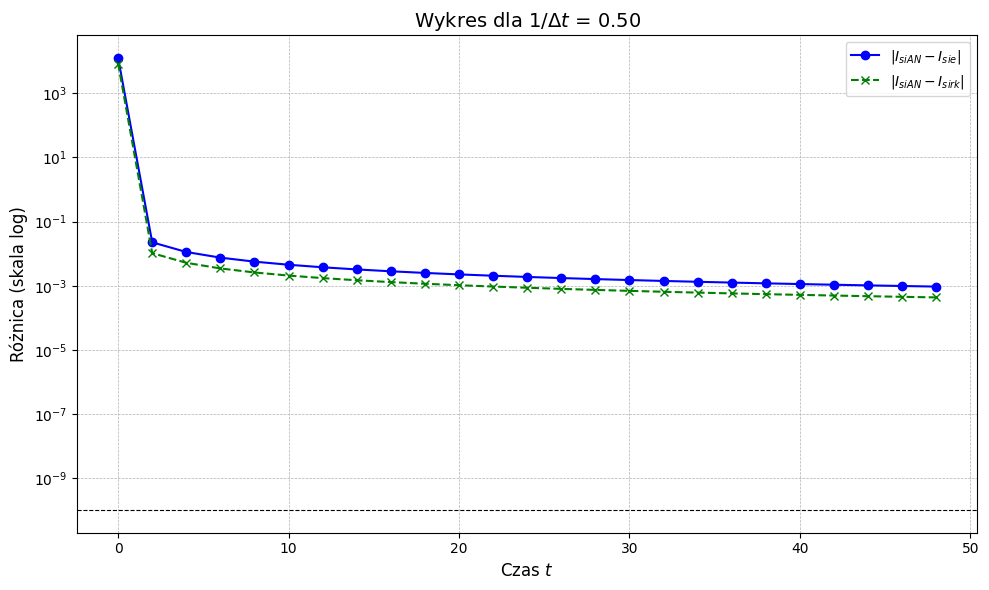

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Dane przykładowe
delta_t = 2  # Wartość kroku czasowego
T = 50  # Maksymalny czas symulacji

# Wyniki analityczne i dane do testów (przykładowe)
t_high_res = np.linspace(0, T, 1000)
IsiAN_high_res = np.interp(t_high_res, np.linspace(0, T, len(IsiAN)), IsiAN)  # Interpolacja
# Punkty czasowe dla delta_t
t_num = np.arange(0, T, delta_t)

# Interpolacja wyników analitycznych w punktach numerycznych
IsiAN_interp = np.interp(1/t_num, t_high_res, IsiAN_high_res)

# Interpolacja wyników numerycznych dla Isie i Isirk
Isie_interp = np.interp(1/t_num, np.linspace(0, T, len(Iesi)), Iesi)
Isirk_interp = np.interp(1/t_num, np.linspace(0, T, len(Irksi)), Irksi)

# Różnice w każdym punkcie
diff_sie = np.abs(IsiAN_interp - Isie_interp)  # Moduł różnic dla logarytmicznej skali
diff_sirk = np.abs(IsiAN_interp - Isirk_interp)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(t_num, diff_sie, label='$|I_{siAN} - I_{sie}|$', marker='o', linestyle='-', color='blue')
plt.plot(t_num, diff_sirk, label='$|I_{siAN} - I_{sirk}|$', marker='x', linestyle='--', color='green')
plt.axhline(1e-10, color='black', linestyle='--', linewidth=0.8)  # Linia pomocnicza dla skali logarytmicznej
plt.title(f'Wykres dla $1/\\Delta t$ = {1/delta_t:.2f}', fontsize=14)
plt.xlabel('Czas $t$', fontsize=12)
plt.ylabel('Różnica (skala log)', fontsize=12)
plt.yscale('log')  # Ustawienie skali logarytmicznej na osi y
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## Wnioski
- **Metoda Rungego-Kutty**: Osiągnęła lepszą dokładność (mniejsze MSE), co sugeruje, że jest bardziej stabilna i dokładna.
- **Metoda Eulera**: Choć jest prostsza do implementacji, jej dokładność jest niższa w porównaniu do metody Rungego-Kutty.

W kontekście zastosowań wymagających dużej precyzji, metoda Rungego-Kutty może być bardziej odpowiednia, natomiast metoda Eulera może być wystarczająca w przypadkach, gdzie mniej dokładne wyniki są akceptowalne.

---

# 5. Podsumowanie

---

# 6. Literatura

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzględnia rozwój epidemii w Polsce, konkretne miasta dużo przydatnych materiałów dobry wzór

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artykuł twórcy filmiku różne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wytłumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR